In [1]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [2]:
df = pd.read_excel('7001_data.xlsx')

In [3]:
df

,Unnamed: 0,省份,家人数量（除自己）,出生年份,出生月份,出生日期,最高教育程度,最高教育程度的状态,获得最高学历时间,所上高中等级,...,有几个亲生女儿,未成年子女数,婚姻状况,伴侣同居情况,父亲出生年份,父亲教育程度,母亲出生年份,母亲教育程度,是否同意孩子在家中最重要,房价指数
0,0,北京市,3,1985,11,1,4.0,毕业,2019,县、市级重点中学,...,没有,1,初婚有配偶,住在一起,1956,初中,1956,初中,不同意也不反对,46941
1,1,北京市,3,1957,2,16,2.0,毕业,1972,不分重点非重点,...,1,没有,初婚有配偶,住在一起,1936,小学,1932,没有受过任何教育,不同意,46941
2,2,北京市,1,1961,9,7,2.0,毕业,1978,不分重点非重点,...,1,1,初婚有配偶,不住在一起，但同在一个城市,1930,私塾、扫盲班,1930,私塾、扫盲班,同意,46941
3,3,北京市,1,1937,11,8,NaN,毕业,不知道,其他（请注明）,...,2,没有,丧偶,NaN,1908,其他,1908,没有受过任何教育,同意,46941
4,4,北京市,2,1968,8,15,4.0,毕业,1991,省/直辖市重点中学,...,没有,没有,初婚有配偶,住在一起,1937,大学本科（正规高等教育）,1938,职业高中,同意,46941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8143,8143,四川省,2,1991,10,7,3.0,毕业,2012,非重点中学,...,NaN,NaN,未婚,NaN,1967,初中,1969,初中,不同意,8304
8144,8144,四川省,5,2002,10,7,4.0,正在读,2020,县、市级重点中学,...,NaN,NaN,未婚,NaN,1979,普通高中,1980,初中,不同意也不反对,8304
8145,8145,四川省,4,1978,5,12,2.0,毕业,1993,NaN,...,没有,没有,初婚有配偶,不住在一起，但同在一个城市,1959,小学,1960,小学,同意,8304
8146,8146,四川省,0,1993,9,10,2.0,辍学和中途退学,2005,NaN,...,NaN,NaN,未婚,NaN,1970,小学,1971,小学,同意,8304


In [4]:
#强制转换成数字，这样可以把其中的字符串转为NaN

df['希望有几个孩子'] = pd.to_numeric(df['希望有几个孩子'], errors='coerce')
df['所住房屋面积'] = pd.to_numeric(df['所住房屋面积'], errors='coerce')
df['个人2020年收入'] = pd.to_numeric(df['个人2020年收入'], errors='coerce')
df['2020家庭年收入'] = pd.to_numeric(df['2020家庭年收入'], errors='coerce')


In [5]:
#生育意愿指标修改，大于一个孩子为高意愿，小于等于一个为低意愿

df.loc[df['希望有几个孩子'] <= 1, '希望有几个孩子'] = 0
df.loc[df['希望有几个孩子'] > 1, '希望有几个孩子'] = 1

In [6]:
#尝试将个人收入log化消除过大收入的影响，但效果不佳
#后续效果不佳的部分代码已删去

#df['个人2020年收入(log)']=np.log10(df['个人2020年收入']+1)#避免log0
#df['个人2020年收入(log)']

In [7]:
#发现个人收入和最高教育程度有微弱相关性，尝试加入交互项，但效果依然不佳
#后续效果不佳的部分代码已删去

#df['交互项']=df['个人2020年收入']*df['最高教育程度']
#df['交互项']

In [8]:
# 删除含有NaN的行

df = df.dropna(subset=['希望有几个孩子','房价指数','所住房屋面积','最高教育程度','个人2020年收入'])

In [15]:
#最后选择将收入过高的作为异常值删去
#过高的标准是超过均值十个标准差以上，去除后的最大值为2000000，故用其作为筛选条件

df4_= df[df['个人2020年收入'] < 2000001]

In [14]:
df['个人2020年收入']

0        60000.0
1        50000.0
2        36000.0
4       130000.0
5       200000.0
          ...   
8135     10000.0
8137         0.0
8141     75000.0
8142     30000.0
8145     42000.0
Name: 个人2020年收入, Length: 6383, dtype: float64

In [62]:
#异质性分组，group1为35岁以上，group2为35岁以下

group1 = df[df['出生年份'] < 1985]
group2 = df[df['出生年份'] >= 1985]

In [63]:
group2

,Unnamed: 0,省份,家人数量（除自己）,出生年份,出生月份,出生日期,最高教育程度,最高教育程度的状态,获得最高学历时间,所上高中等级,...,有几个亲生女儿,未成年子女数,婚姻状况,伴侣同居情况,父亲出生年份,父亲教育程度,母亲出生年份,母亲教育程度,是否同意孩子在家中最重要,房价指数
0,0,北京市,3,1985,11,1,4.0,毕业,2019,县、市级重点中学,...,没有,1,初婚有配偶,住在一起,1956,初中,1956,初中,不同意也不反对,46941
18,18,山东省,0,1997,12,29,4.0,毕业,2019,县、市级重点中学,...,NaN,NaN,未婚,NaN,1970,初中,1970,小学,同意,8743
23,23,山东省,3,1988,5,20,3.0,毕业,2020,其他（请注明）,...,2,3,初婚有配偶,住在一起,1964,初中,1964,小学,同意,8743
39,39,山东省,5,2002,8,11,2.0,毕业,2021,不分重点非重点,...,NaN,NaN,未婚,NaN,1974,中专,1974,初中,不同意,8743
44,44,山东省,2,1990,2,23,3.0,毕业,2008,不分重点非重点,...,没有,1,初婚有配偶,住在一起,1957,初中,1958,初中,同意,8743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8133,8133,四川省,0,1985,10,26,2.0,毕业,2003,非重点中学,...,没有,1,初婚有配偶,不住在一起，在同一个省的不同城市,1964,没有受过任何教育,1963,没有受过任何教育,同意,8304
8134,8134,四川省,0,1989,1,23,2.0,毕业,2011,不分重点非重点,...,1,1,分居未离婚,不住在一起，在同一个省的不同城市,1966,初中,1968,小学,同意,8304
8135,8135,四川省,2,2003,4,23,1.0,NaN,NaN,NaN,...,NaN,NaN,未婚,NaN,1976,初中,1979,小学,不同意也不反对,8304
8137,8137,四川省,2,2001,3,26,4.0,正在读,2020,省/直辖市重点中学,...,NaN,NaN,未婚,NaN,1974,大学本科（正规高等教育）,1976,大学本科（正规高等教育）,不同意,8304


In [64]:
#逻辑回归的变量准备
#没有用循环是因为方便修改单个模型

x1=df[["房价指数"]]
x2=df[['房价指数','所住房屋面积']]
x3=df[['房价指数','所住房屋面积','最高教育程度']]
x4=df[['房价指数','所住房屋面积','最高教育程度','个人2020年收入']]

x4_=df4_[['房价指数','所住房屋面积','最高教育程度','个人2020年收入']]


y1=df['希望有几个孩子']
y2=df['希望有几个孩子']
y3=df['希望有几个孩子']
y4=df['希望有几个孩子']

y4_=df4_['希望有几个孩子']

In [65]:
#异质性分组变量
x_old=group1[['房价指数','所住房屋面积','最高教育程度','个人2020年收入']]
y_old=group1['希望有几个孩子']

x_young=group2[['房价指数','所住房屋面积','最高教育程度','个人2020年收入']]
y_young=group2['希望有几个孩子']

In [66]:
# 归一化
scaler = MinMaxScaler()
x1= pd.DataFrame(scaler.fit_transform(x1), columns=x1.columns)

scaler = MinMaxScaler()
x2= pd.DataFrame(scaler.fit_transform(x2), columns=x2.columns)

scaler = MinMaxScaler()
x3= pd.DataFrame(scaler.fit_transform(x3), columns=x3.columns)

scaler = MinMaxScaler()
x4= pd.DataFrame(scaler.fit_transform(x4), columns=x4.columns)



scaler = MinMaxScaler()
x4_= pd.DataFrame(scaler.fit_transform(x4_), columns=x4_.columns)

In [67]:
scaler = MinMaxScaler()
x_old= pd.DataFrame(scaler.fit_transform(x_old), columns=x_old.columns)

scaler = MinMaxScaler()
x_young= pd.DataFrame(scaler.fit_transform(x_young), columns=x_young.columns)

In [68]:
# 为特征数据添加截距项
x1 = sm.add_constant(x1)

x2 = sm.add_constant(x2)

x3 = sm.add_constant(x3)

x4 = sm.add_constant(x4)


x4_ = sm.add_constant(x4_)


In [69]:
x_old = sm.add_constant(x_old)
x_young = sm.add_constant(x_young)

In [70]:
# 处理后索引不匹配，重置索引

y1 = y1.reset_index(drop=True)
y2 = y2.reset_index(drop=True)
y3 = y3.reset_index(drop=True)
y4 = y4.reset_index(drop=True)

y4_ = y4_.reset_index(drop=True)

x1 = x1.reset_index(drop=True)
x2 = x2.reset_index(drop=True)
x3 = x3.reset_index(drop=True)
x4 = x4.reset_index(drop=True)

x4_ = x4_.reset_index(drop=True)

In [71]:
y_old = y_old.reset_index(drop=True)
x_old = x_old.reset_index(drop=True)

y_young = y_young.reset_index(drop=True)
x_young = x_young.reset_index(drop=True)

In [72]:
# 建立逻辑回归模型
model1 = sm.Logit(y1, x1)

model2 = sm.Logit(y2, x2)

model3 = sm.Logit(y3, x3)

model4 = sm.Logit(y4, x4)


model4_ = sm.Logit(y4_, x4_)

In [73]:
model_old = sm.Logit(y_old, x_old)

In [74]:
model_young = sm.Logit(y_young, x_young)

In [75]:
# 拟合模型
result1 = model1.fit()
result2 = model2.fit()
result3 = model3.fit()
result4 = model4.fit()

result4_ = model4_.fit()

Optimization terminated successfully.
         Current function value: 0.497303
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.493931
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.478798
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.478797
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.478110
         Iterations 6


In [76]:
result_old = model_old.fit()

Optimization terminated successfully.
         Current function value: 0.414252
         Iterations 7


In [77]:
result_young = model_young.fit()

Optimization terminated successfully.
         Current function value: 0.644490
         Iterations 6


In [78]:
# 输出回归结果摘要(分开)
print(result1.summary())

                           Logit Regression Results                           
Dep. Variable:                希望有几个孩子   No. Observations:                 6383
Model:                          Logit   Df Residuals:                     6381
Method:                           MLE   Df Model:                            1
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.02227
Time:                        22:58:38   Log-Likelihood:                -3174.3
converged:                       True   LL-Null:                       -3246.6
Covariance Type:            nonrobust   LLR p-value:                 2.633e-33
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5859      0.038     41.861      0.000       1.512       1.660
房价指数          -1.1729      0.094    -12.433      0.000      -1.358      -0.988


In [79]:
print(result2.summary())

                           Logit Regression Results                           
Dep. Variable:                希望有几个孩子   No. Observations:                 6383
Model:                          Logit   Df Residuals:                     6380
Method:                           MLE   Df Model:                            2
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.02890
Time:                        22:58:39   Log-Likelihood:                -3152.8
converged:                       True   LL-Null:                       -3246.6
Covariance Type:            nonrobust   LLR p-value:                 1.790e-41
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2589      0.065     19.460      0.000       1.132       1.386
房价指数          -1.0364      0.097    -10.700      0.000      -1.226      -0.847
所住房屋面积         4.8447      0.819      5.914      0.0

In [80]:
print(result3.summary())

                           Logit Regression Results                           
Dep. Variable:                希望有几个孩子   No. Observations:                 6383
Model:                          Logit   Df Residuals:                     6379
Method:                           MLE   Df Model:                            3
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.05865
Time:                        22:58:40   Log-Likelihood:                -3056.2
converged:                       True   LL-Null:                       -3246.6
Covariance Type:            nonrobust   LLR p-value:                 3.137e-82
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7599      0.077     22.763      0.000       1.608       1.911
房价指数          -0.7199      0.101     -7.132      0.000      -0.918      -0.522
所住房屋面积         4.5322      0.845      5.365      0.0

In [81]:
print(result4.summary())

                           Logit Regression Results                           
Dep. Variable:                希望有几个孩子   No. Observations:                 6383
Model:                          Logit   Df Residuals:                     6378
Method:                           MLE   Df Model:                            4
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.05865
Time:                        22:58:42   Log-Likelihood:                -3056.2
converged:                       True   LL-Null:                       -3246.6
Covariance Type:            nonrobust   LLR p-value:                 3.808e-81
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7600      0.077     22.763      0.000       1.608       1.912
房价指数          -0.7193      0.101     -7.118      0.000      -0.917      -0.521
所住房屋面积         4.5348      0.845      5.367      0.0

In [82]:
print(result4_.summary())

                           Logit Regression Results                           
Dep. Variable:                希望有几个孩子   No. Observations:                 6376
Model:                          Logit   Df Residuals:                     6371
Method:                           MLE   Df Model:                            4
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.05979
Time:                        22:58:43   Log-Likelihood:                -3048.4
converged:                       True   LL-Null:                       -3242.3
Covariance Type:            nonrobust   LLR p-value:                 1.275e-82
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7600      0.078     22.693      0.000       1.608       1.912
房价指数          -0.7766      0.104     -7.488      0.000      -0.980      -0.573
所住房屋面积         4.4883      0.846      5.307      0.0

In [83]:
print(result_old.summary())

                           Logit Regression Results                           
Dep. Variable:                希望有几个孩子   No. Observations:                 4924
Model:                          Logit   Df Residuals:                     4919
Method:                           MLE   Df Model:                            4
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.05721
Time:                        22:58:44   Log-Likelihood:                -2039.8
converged:                       True   LL-Null:                       -2163.5
Covariance Type:            nonrobust   LLR p-value:                 2.214e-52
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8853      0.092     20.497      0.000       1.705       2.066
房价指数          -1.2146      0.121    -10.054      0.000      -1.451      -0.978
所住房屋面积         4.9328      1.049      4.702      0.0

In [84]:
print(result_young.summary())

                           Logit Regression Results                           
Dep. Variable:                希望有几个孩子   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1454
Method:                           MLE   Df Model:                            4
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.01529
Time:                        22:58:46   Log-Likelihood:                -940.31
converged:                       True   LL-Null:                       -954.91
Covariance Type:            nonrobust   LLR p-value:                 7.102e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7684      0.160      4.790      0.000       0.454       1.083
房价指数          -0.1379      0.199     -0.693      0.488      -0.528       0.252
所住房屋面积         3.2105      1.371      2.341      0.0

In [85]:
from statsmodels.iolib.summary2 import summary_col

# 输出回归结果摘要(合并)
summary = summary_col([result1, result2, result3,  result4, result4_], 
                      model_names=['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5'], 
                      stars=True, 
                      info_dict={'Observations': lambda x: str(int(x.nobs))})

print(summary)


              Model 1    Model 2    Model 3    Model 4    Model 5  
-------------------------------------------------------------------
const        1.5859***  1.2589***  1.7599***  1.7600***  1.7600*** 
             (0.0379)   (0.0647)   (0.0773)   (0.0773)   (0.0776)  
房价指数         -1.1729*** -1.0364*** -0.7199*** -0.7193*** -0.7766***
             (0.0943)   (0.0969)   (0.1009)   (0.1010)   (0.1037)  
所住房屋面积                  4.8447***  4.5322***  4.5348***  4.4883*** 
                        (0.8192)   (0.8447)   (0.8450)   (0.8458)  
最高教育程度                             -1.3337*** -1.3325*** -1.4109***
                                   (0.0958)   (0.0962)   (0.1014)  
个人2020年收入                                     -0.1420    2.0066**  
                                              (0.9903)   (0.9136)  
Observations 6383       6383       6383       6383       6376      
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [96]:
# 输出分组回归结果摘要(合并)

summary1 = summary_col([result_young, result_old], 
                      model_names=['model_young', 'model_old'], 
                      stars=True, 
                      info_dict={'Observations': lambda x: str(int(x.nobs))})

print(summary1)


             model_young model_old 
-----------------------------------
const        0.7684***   1.8853*** 
             (0.1604)    (0.0920)  
房价指数         -0.1379     -1.2146***
             (0.1991)    (0.1208)  
所住房屋面积       3.2105**    4.9328*** 
             (1.3713)    (1.0490)  
最高教育程度       -0.6975***  -0.8336***
             (0.1796)    (0.1391)  
个人2020年收入    7.0457*     -1.0863   
             (3.9094)    (0.9174)  
Observations 1459        4924      
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


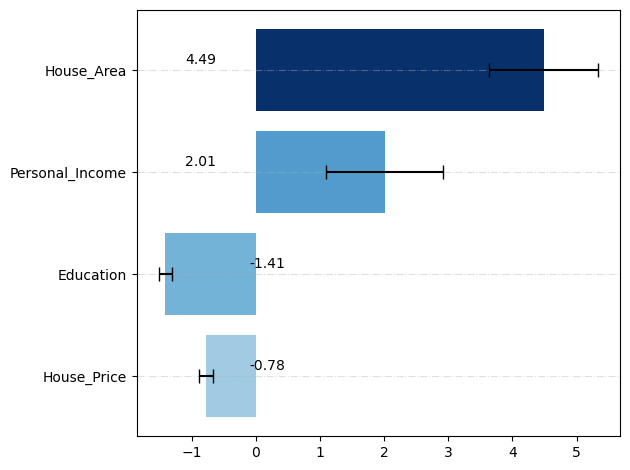

In [90]:
# 尝试绘制回归系数的可视化

import matplotlib.pyplot as plt

# 变量重要性排序
coef_lr = pd.DataFrame({'var' : ['House_Price', 'House_Area', 'Education', 'Personal_Income'],
                        'coef' : result4_.params.drop('const').values,
                        'se': result4_.bse.drop('const').values
                        })

index_sort =  np.abs(coef_lr['coef']).sort_values().index
coef_lr_sort = coef_lr.loc[index_sort,:]


# 水平柱形图绘图
fig,ax=plt.subplots()
x, y = coef_lr_sort['var'], coef_lr_sort['coef']

# 定义颜色映射
norm = plt.Normalize(min(y), max(y))  # 归一化y值
cmap = plt.get_cmap('Blues')  # 使用'Blues'色系

rects = plt.barh(x, y, color=cmap(norm(abs(y))))
ax.errorbar(y, np.arange(len(y)), xerr=coef_lr_sort['se'], fmt='none', ecolor='black', elinewidth=1.5, capsize=5)
plt.grid(linestyle="-.", axis='y', alpha=0.4)
plt.tight_layout()

#添加数据标签
for rect in rects:
    w = rect.get_width()
    ax.text(-0.5*w/abs(w)-0.6, rect.get_y()+rect.get_height()/1.6,'%.2f' %w,ha='left',va='center')

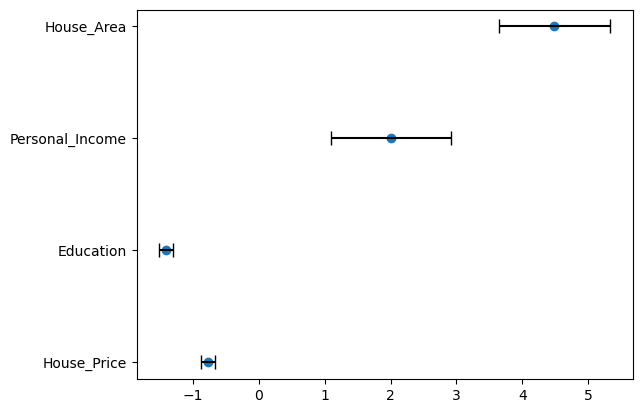

In [91]:
#另一种可视化

coef_lr = pd.DataFrame({'var' :['House_Price', 'House_Area', 'Education', 'Personal_Income'],
                        'coef' : result4_.params.drop('const').values,
                        'se': result4_.bse.drop('const').values
                        })

index_sort =  np.abs(coef_lr['coef']).sort_values().index
coef_lr_sort = coef_lr.loc[index_sort,:]


# 水平柱形图绘图
y, x = coef_lr_sort['var'], coef_lr_sort['coef']

# 定义颜色映射

plt.scatter(x,y)
plt.errorbar(x, y, xerr=coef_lr_sort['se'], fmt='none', ecolor='black', elinewidth=1.5, capsize=5)

plt.show()



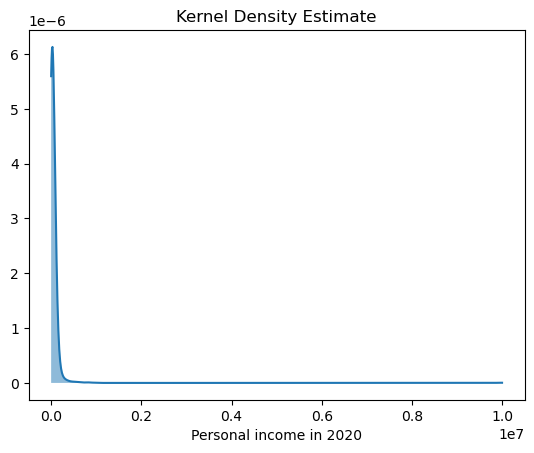

In [92]:
# 绘制个人收入的核密度图

from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import numpy as np


data = df  
column_name = '个人2020年收入'

# 计算核密度
values = data[column_name].dropna()  # 确保没有NaN值
kde = gaussian_kde(values)

# 设置绘制范围
x = np.linspace(values.min(), values.max(), 1000)

# 计算核密度值
density = kde(x)

# 绘制核密度图
plt.plot(x, density)
plt.fill_between(x, density, alpha=0.5)
plt.title('Kernel Density Estimate')
plt.xlabel('Personal income in 2020')



plt.show()

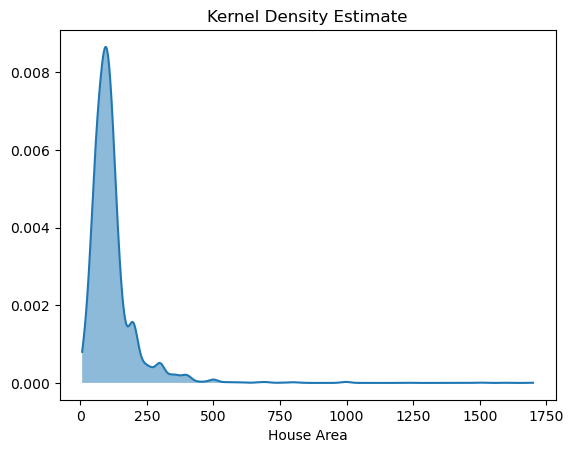

In [93]:
# 绘制房屋面积的
data = df  
column_name = '所住房屋面积'

# 计算核密度
values = data[column_name].dropna()  # 确保没有NaN值
kde = gaussian_kde(values)

# 设置绘制范围
x = np.linspace(values.min(), values.max(), 1000)

# 计算核密度值
density = kde(x)

# 绘制核密度图
plt.plot(x, density)
plt.fill_between(x, density, alpha=0.5)
plt.title('Kernel Density Estimate')
plt.xlabel('House Area')



plt.show()